In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import relevant Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('/content/drive/My Drive/git_code/final_merged_dataset.csv')

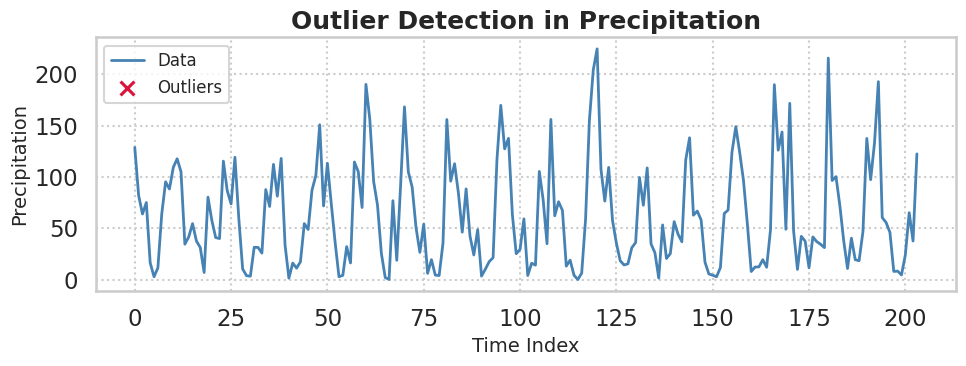

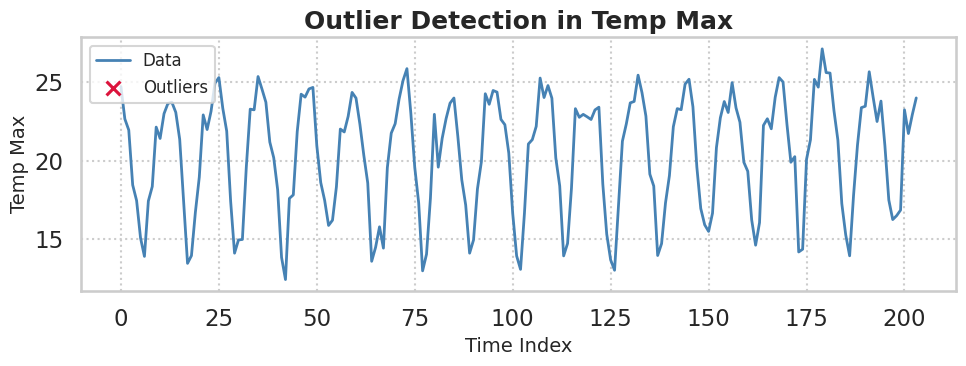

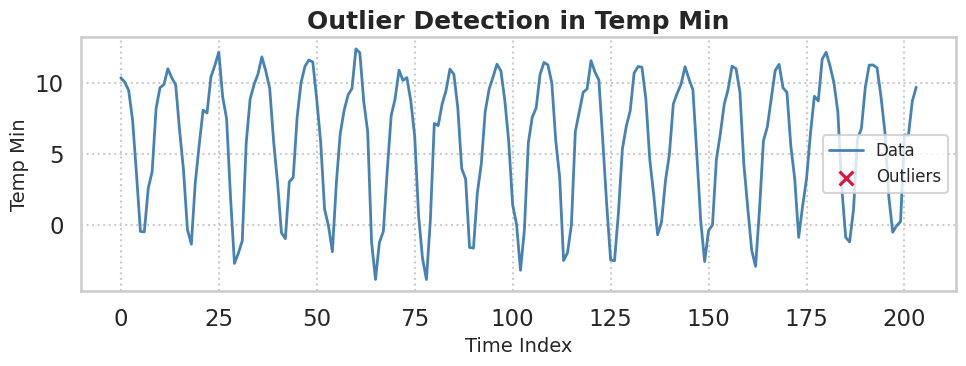

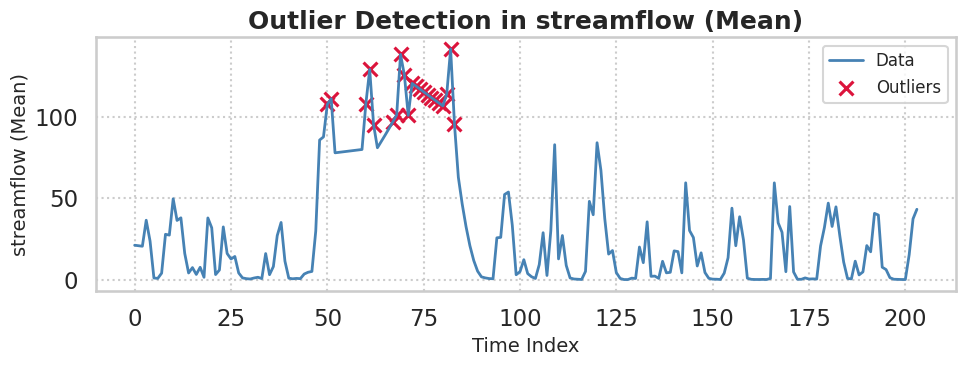

In [3]:

# Set seaborn style for academic-quality plots
sns.set(style="whitegrid", context="talk", palette="deep")

# Function: Modified Z-score outlier detection
def detect_outliers_modified_zscore(series, threshold=3.5):
    """
    Detect outliers using Modified Z-score with MAD.
    Args:
        series (pd.Series): Numeric time series data
        threshold (float): Cutoff for defining outliers (default=3.5)
    Returns:
        pd.Series: Boolean mask where True = outlier
    """
    median = series.median()
    mad = np.median(np.abs(series - median))
    if mad == 0:
        return pd.Series([False] * len(series), index=series.index)  # No variability
    modified_z_scores = 0.6745 * (series - median) / mad
    return np.abs(modified_z_scores) > threshold

# Features of interest
features = ["Precipitation", "Temp Max", "Temp Min", "streamflow (Mean)"]

# Apply outlier detection and visualise inline
for col in features:
    if col not in df.columns:
        print(f"Column '{col}' not found in dataset.")
        continue

    if is_numeric_dtype(df[col]):
        # Detect outliers
        outlier_mask = detect_outliers_modified_zscore(df[col])

        # Plot results inline
        plt.figure(figsize=(10, 4))
        plt.plot(df.index, df[col], label="Data", color="steelblue", linewidth=2)
        plt.scatter(df.index[outlier_mask], df[col][outlier_mask],
                    color="crimson", label="Outliers", marker="x", s=100)

        # Titles and labels with academic polish
        plt.title(f"Outlier Detection in {col}", fontsize=18, weight="bold")
        plt.xlabel("Time Index", fontsize=14)
        plt.ylabel(col, fontsize=14)
        plt.legend(fontsize=12)
        plt.grid(ls=":", lw=1.5)
        plt.tight_layout()
        plt.show()
